# 데이터 전처리와 EDA

## 1.데이터 전처리란?
<ol>
<li><h3>분석할 데이터 원본을 머신러닝 및 딥러닝을 할 수 있도록 준비하는 과정</h3></li>
<ul>
<li>데이터 타입 변환(문자/숫자)</li>
<li>구간화</li>
<li>정규화</li>
<li>카테고리변수의 레이블인코딩</li>
<li>데이터 편향 수정</li>
<li>EDA를 통한 특성 생성 및 삭제</li>
</ul>
<li><h3>데이터 전처리는 머신러닝을 통해 도출되는 모델의 성능에 직접적인 영향을 끼치는 중요 요소</h3></li>
<ul><li>Garbage in Garbage out</li></ul>

</ol>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/인공지능기반고객구매요인분석과의사결정과정/datas/titanic.xlsx")

In [7]:
# 데이터를 불러온 후 data2로 복사
data2 = data.copy()
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2. 데이터 전처리 없이 분석을 시도 할 경우 생기는 일

In [8]:
X2 = data2.drop('sold', axis=1)
y2 = data2['sold']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=100)

KeyError: ignored

In [ ]:
model2 = DecisionTreeClassifier(max_depth = 3)
model2.fit(X_train2, y_train2)
pred2 = model2.predict(X_test2)
print(round(accuracy_score(y_test2, pred2), 4))

## 3. 머신러닝, 딥러닝 분석을 위한 필수 데이터 전처리
<ol>
<li>결측값 제거(데이터가 없는 것)/보간(비슷한 조건의 값으로 대체)</li>
<li>문자 데이터를 숫자형으로 변환 (레이블 인코딩)</li>
</ol>

## 4. 데이터 전처리를 위해서 데이터를 자세히 분석하는 것
<ul><li><h3>EDA(Exploratory Data Analysis, 탐색적 데이터 분석)</h3></li>
<ol><li>데이터의 크기와 구성(몇 행, 몇 열, 데이터 내용</li>
<li>데이터 타입은 올바른가?</li>
<li>데이터에 결측값이 있는가?</li>
<li>데이터에 이상값이 있는가?(비정상적으로 너무 크거나 작거나)</li>
<li>데이터의 분포에 편향이 있는가?</li>
<li>문자 데이터의 카테고리화/구간화가 필요한가?</li>
</ol>
</ul>


## 5. 데이터 전처리와 EDA를 위해 사용하는 라이브러리(Pandas, matplotlib)

# 데이터 전처리 연습 

In [9]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# null값 처리하기

In [11]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 1. dropna()로 모두 삭제하기

In [12]:
data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [13]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# 2.평균 값 혹은 다른 텍스트로 대체하기

In [15]:
round(data['Age'].mean())

30

In [16]:
data['Age'] = data['Age'].fillna(round(data['Age'].mean()))

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
data['Age'].value_counts()

30.00    202
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

In [20]:
data.drop(["Cabin"], axis= 1, inplace=True)

In [21]:
data.dropna(inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## 나이 데이터를 구간화

In [23]:
def age_adj(x):
    if x < 10:
        return 'under 10s'
    elif 10 <= x < 20:
        return '10s'
    elif 20<= x < 30:
        return '20s'
    elif 30 <= x < 40:
        return '30s'
    elif  40<= x <50:
        return '40s'
    elif 50 <= x < 60:
        return '50s'
    elif 60 <= x < 70:
        return '60s'
    elif 70 <= x <80:
        return '70s'
    elif 80 <= x <90:
        return '80s'
    else:
        return '90s'

In [24]:
data['Age'] = data['Age'].apply(lambda x : age_adj(x))

In [25]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,20s,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30s,1,0,PC 17599,71.2833,C


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    object 
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.3+ KB


In [27]:
data2 = data.copy()

# 범주형 데이터 One-Hot Encoding 하기

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,20s,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30s,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,20s,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30s,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,30s,0,0,373450,8.0500,S


In [29]:
data = data.drop(['PassengerId','Name', 'Ticket'], axis=1)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    object 
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 62.5+ KB


In [31]:
data = pd.get_dummies(data, columns=['Age', 'Sex', 'Embarked'], drop_first=True)

In [32]:
data

,Survived,Pclass,SibSp,Parch,Fare,Age_20s,Age_30s,Age_40s,Age_50s,Age_60s,Age_70s,Age_80s,Age_under 10s,Sex_male,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,1,0,0,0,0,0,0,0,1,0,1
1,1,1,1,0,71.2833,0,1,0,0,0,0,0,0,0,0,0
2,1,3,0,0,7.9250,1,0,0,0,0,0,0,0,0,0,1
3,1,1,1,0,53.1000,0,1,0,0,0,0,0,0,0,0,1
4,0,3,0,0,8.0500,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1,0,0,0,0,0,0,0,1,0,1
887,1,1,0,0,30.0000,0,0,0,0,0,0,0,0,0,0,1
888,0,3,1,2,23.4500,0,1,0,0,0,0,0,0,0,0,1
889,1,1,0,0,30.0000,1,0,0,0,0,0,0,0,1,0,0


# Decesion Tree(의사결정나무)로 데이터 분석하기

In [33]:
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
model =  DecisionTreeClassifier(max_depth =10)

In [36]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [37]:
pred = model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
accuracy_score(y_test, pred)

0.797752808988764

In [40]:
for i in range(2, 31):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(i, round(accuracy_score(y_test, pred), 4))

2 0.7697
3 0.8483
4 0.8596
5 0.8315
6 0.8315
7 0.8371
8 0.8371
9 0.7921
10 0.7978
11 0.7978
12 0.8034
13 0.8034
14 0.7978
15 0.809
16 0.809
17 0.7921
18 0.7921
19 0.809
20 0.8034
21 0.7978
22 0.7921
23 0.8034
24 0.8034
25 0.7978
26 0.8034
27 0.8034
28 0.8146
29 0.8034
30 0.7978


In [41]:
model = DecisionTreeClassifier(max_depth = 4)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(round(accuracy_score(y_test, pred), 4))

0.8596


In [42]:
print(confusion_matrix(y_test, pred))

[[105   9]
 [ 16  48]]


In [43]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'Sex_male <= 0.5\n0.475\n711\n[435, 276]'),
 Text(0.25, 0.7, 'Pclass <= 2.5\n0.384\n251\n[65, 186]'),
 Text(0.125, 0.5, 'Fare <= 149.035\n0.07\n137\n[5, 132]'),
 Text(0.0625, 0.3, 'Fare <= 28.856\n0.05\n118\n[3, 115]'),
 Text(0.03125, 0.1, '0.107\n53\n[3, 50]'),
 Text(0.09375, 0.1, '0.0\n65\n[0, 65]'),
 Text(0.1875, 0.3, 'Fare <= 152.506\n0.188\n19\n[2, 17]'),
 Text(0.15625, 0.1, '0.444\n3\n[2, 1]'),
 Text(0.21875, 0.1, '0.0\n16\n[0, 16]'),
 Text(0.375, 0.5, 'Fare <= 22.904\n0.499\n114\n[60, 54]'),
 Text(0.3125, 0.3, 'Age_40s <= 0.5\n0.495\n93\n[42, 51]'),
 Text(0.28125, 0.1, '0.489\n89\n[38, 51]'),
 Text(0.34375, 0.1, '0.0\n4\n[4, 0]'),
 Text(0.4375, 0.3, 'Parch <= 0.5\n0.245\n21\n[18, 3]'),
 Text(0.40625, 0.1, '0.0\n1\n[0, 1]'),
 Text(0.46875, 0.1, '0.18\n20\n[18, 2]'),
 Text(0.75, 0.7, 'Fare <= 26.269\n0.315\n460\n[370, 90]'),
 Text(0.625, 0.5, 'Age_under 10s <= 0.5\n0.226\n323\n[281, 42]'),
 Text(0.5625, 0.3, 'Age_20s <= 0.5\n0.189\n313\n[280, 33]'),
 Text(0.53125, 

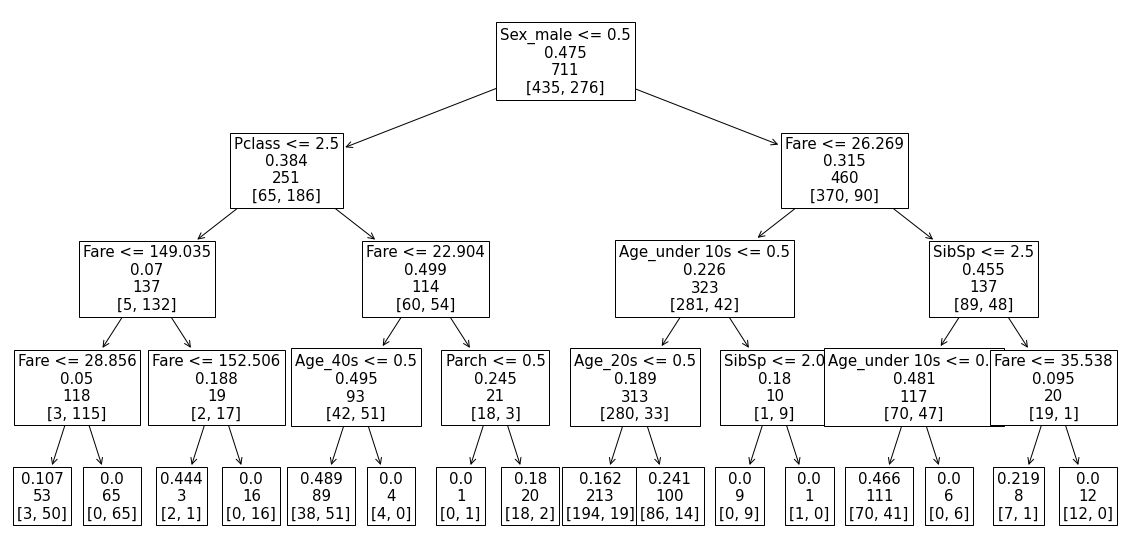

In [44]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X_train.columns, fontsize=15, label ="None", max_depth = 4)

In [45]:
data2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,20s,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,30s,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,20s,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,30s,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,30s,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,20s,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,10s,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30s,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,20s,0,0,111369,30.0000,C


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 10, random_state = 100)
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, pred)

0.8426966292134831

In [49]:
confusion_matrix(y_test, pred)

array([[102,  12],
       [ 16,  48]])

In [50]:
for i in range(2,20):
    model = RandomForestClassifier(max_depth = i, random_state = 100, n_jobs=3)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(accuracy_score(y_test, pred))

0.7865168539325843
0.7865168539325843
0.8202247191011236
0.8370786516853933
0.8539325842696629
0.8426966292134831
0.8370786516853933
0.848314606741573
0.8426966292134831
0.8258426966292135
0.8258426966292135
0.8258426966292135
0.8089887640449438
0.8202247191011236
0.8089887640449438
0.8146067415730337
0.8146067415730337
0.8146067415730337
